
# 第03章 特征工程与模型复杂性--重新审视泰坦尼克号案例

模型复杂性与模型评估是建立成功的数据科学系统必须迈出的一步。 你可以使用许多工具来评估和选择模型。 在本章中，我们将介绍一些可以通过添加更多描述性功能并且从现有功能中提取有意义信息来帮助你提高数据价值的工具。我们还将讨论与其他工具相关的最佳数字特征，并了解为什么具有大量特征和较少的训练样本/观察值是一个问题。
  以下是本章将要解释的主题：
- 特征工程
- 维数灾难
- 泰坦尼克号重新审视
- 偏差方差分解
- 学习可见度
- 总结

## 1 特征工程

特征工程是有助于模型性能的关键组件之一。 具有正确特征的简单模型可以比具有较差特征的复杂模型执行得更好。 你可以将特征工程过程视为确定预测模型成功或失败的最重要步骤。 如果你在了解数据的基础上，特征工程将更容易进行。
任何使用机器学习来解决一个问题的人都广泛使用特征工程，即：如何最大限度地利用数据样本进行预测建模？这就是特征工程的过程和实践所解决的问题，数据科学技能的成功始于知道如何很好地表示数据。
预测建模是将特征或输入变量（x1、x2、…、xn）的列表转换为感兴趣的输出/目标（y）的公式或规则。那么，什么是特征工程？这是从现有输入变量（x1，x2，…，xn）创建新的输入变量（Z1，Z2，…，Zn）的过程。我们不只是创建任何新的特性；新创建的特性应该有助于并与模型的输出相关。创建与模型输出相关的特性将是一个具有领域知识（如营销、医疗等）的简单过程。如果机器学习实践者在此过程中与一些领域专家交流，特征工程过程的结果也会更好。
在给定一组输入变量/特征（温度，风速和云覆盖的百分比）的情况下，域知识可能有用的示例是对降雨可能性进行建模。 对于这个具体的例子，我们可以构造一个名为遮盖物（overcast）的新二进制特性，当云覆盖的百分比小于20％时，其值等于1或否，否则等于0或是。 在此示例中，域知识对于指定阈值或截止百分比至关重要。 输入越有仔细和有用，模型的可靠性和预测性就越好。

### 1.1 特征工程的类型

特征工程作为一种技术有三个主要的子类别。 作为一名深度学习实践者，你可以自由选择或以某种方式将它们组合在一起。

### 1.2 特征选择

有时称为特征重要性，这是根据输入变量对目标/输出变量的贡献对输入变量进行排序的过程。 此外，该过程可以被认为是输入变量的排序过程，根据它们在模型的预测能力中的值。 
一些学习方法将这种特征排名或重要性作为其内部过程的一部分（例如决策树）。 大多数情况下，这些方法使用熵来过滤掉价值较低的变量。 在某些情况下，深度学习从业者使用这种学习方法来选择最重要的特征，然后将它们提供给更好的学习算法。

### 1.3 降维

降维有时是特征提取，它是将现有输入变量组合成一组数量减少很多的输入变量的过程。 这种特征工程最常用的方法之一是主成分分析（PCA），它利用数据的方差来提供减少数量的输入变量，这些变量看起来不像原始输入变量。

### 1.4 特征构造

特征构造是一种常用的特征工程类型，人们在谈论特征工程时通常会参考它。 该技术是从原始数据构建新特征的过程。 在这种类型的特征工程中，域知识对于从现有特征中手动组成其他特征非常有用。 与其他特征工程技术一样，特征构造的目的是提高模型的预测性。 特征构造的一个简单示例是使用日期戳功能生成两个新特征，例如AM和PM，这可能有助于区分白天和黑夜。 我们还可以通过计算噪声特征的平均值，然后确定给定行是否大于或小于该平均值，将噪声数值特征转换为更简单的标称特征。

### 1.5 泰坦尼克号案例重新审视

在本节中，我们将再次介绍泰坦尼克号示例，但是在使用特征工程工具时从不同的角度来看。如果你跳过数据第二章节“建模在行动 - 泰坦尼克号示例”，则泰坦尼克号示例是一个Kaggle比赛，目的是预测特定乘客是否幸存。在重新阅读泰坦尼克号的例子中，我们将使用scikit-learn和pandas库。 
  
首先，让我们先读取训练集和测试集，然后获取一些有关数据的统计数据：



```python
# 用pandas读取训练集与测试集
train_data = pd.read_csv('data/train.csv', header=0)
test_data = pd.read_csv('data/test.csv', header=0)
```

```python
# 将训练集和测试集连接在一起，以完成整体特征工程
df_titanic_data = pd.concat([train_data, test_data])
```

```python
# 通过重新索引数据来移除训练集和测试集所导致的重复索引
df_titanic_data.reset_index(inplace=True)
```

```python
# 删除reset_index（）函数生成的索引列
df_titanic_data.drop('index', axis=1, inplace=True)
```

```python
# 将列索引为从1开始的索引
df_titanic_data = df_titanic_data.reindex_axis(train_data.columns, axis=1)
```

我们需要指出前面代码片段的一些内容：

如上所示，我们使用pandas的concat函数来组合训练集和测试集的数据帧。 这对于特征工程任务很有用，因为我们需要完整地查看输入变量/特征的分布。 在组合两个数据帧之后，我们需要对输出数据帧进行一些修改。

### 1.6 缺失值

在从客户获取新数据集之后，首先要考虑缺失值，因为几乎每个数据集中都会存在丢失或不正确的数据。 在接下来的章节中，你将看到一些学习算法能够处理缺失的值，而其他学习算法则需要你自己学习处理缺失的数据。 在此示例中，我们将使用scikit-learn中的随机森林分类器，这需要单独处理丢失的数据。下面是不同的方法来处理缺失的数据。

#### <font size=3>1.6.1 删除任何具有缺失值的样本</font>

如果有一个包含大量缺失值的小数据集，则此方法并不是一个好的选择，因为删除缺失值的样本将产生无用的数据。 如果你有大量数据，这可能是一个快速而简单的选择，删除它不会对原始数据集产生太大影响。

#### <font size=3>1.6.2 缺失值的输入</font>

当有分类数据时，此方法很有用。 这种方法背后的直觉是缺失值可能与其他变量相关，并且删除它们将导致可能显着影响模型的信息丢失。 例如，如果我们有一个带有两个可能值的二进制变量-1和1，我们可以添加另一个值（0）来表示缺失值。您可以使用以下代码将特征客舱（Cabin）的空值替换为U0：

```python
# 用“U0”替换客舱变量中的缺失值
df_titanic_data['Cabin'][df_titanic_data.Cabin.isnull()] = 'U0'
```

#### <font size=3>1.6.3 分配平均值</font>

由于其简单性，这也是常用方法之一。 在数字特征的情况下，可以用平均值或中值替换缺失值。 还可以在分类变量的情况下使用此方法，方法是将模式（具有最高出现次数的值）分配给缺失值。

以下代码将特征票价（Fare）的非缺失值的中位数分配给缺失值：

```python
# 用票价的中位数来替换票价的缺失值
df_titanic_data['Fare'].median()
```
或者，你可以使用以下代码查找特征出发端口（Emarked）中出现次数最多的值，并将其分配给缺失值

```python
# 用众数替换缺失值
df_titanic_data.Embarked.dropna().mode().values
```

#### <font size=3>1.6.4 使用回归或其他简单模型来预测缺失变量的值</font>

这是我们将用于泰坦尼克号示例的特征年龄（Age）的方法. 年龄（Age）是预测乘客生存的重要一步，采用以前的方法取平均值将使我们失去一些信息。 要预测缺失值，需要使用监督学习算法，该算法将可用特征作为输入，并将要为其缺失值预测的特征的可用值作为输出。在以下代码段中，我们使用随机森林分类器预测特征年龄（Age）的缺失值：

```python
# 定义一个辅助函数，可以使用RandomForestClassifier(随机森林分类器)来处理age变量的缺失值
def set_missing_ages():
   global df_titanic_data

   age_data = df_titanic_data[
       ['Age', 'Embarked', 'Fare', 'Parch', 'SibSp', 'Title_id', 'Pclass', 'Names', 'CabinLetter']]
   input_values_RF = age_data.loc[(df_titanic_data.Age.notnull())].values[:, 1::]
   target_values_RF = age_data.loc[(df_titanic_data.Age.notnull())].values[:, 0]

   # 从sklearn的随机森林回归函数创建对象
   regressor = RandomForestRegressor(n_estimators=2000, n_jobs=-1)

   # 根据上面的输入值和目标值构建模型
   regressor.fit(input_values_RF, target_values_RF)

   # 使用训练的模型来预测缺失值
   predicted_ages = regressor.predict(age_data.loc[(df_titanic_data.Age.isnull())].values[:, 1::])

   # 在原始的泰坦数据帧中填充预测的年龄
   age_data.loc[(age_data.Age.isnull()), 'Age'] = predicted_ages
   df_titanic_data.loc[(df_titanic_data.Age.isnull()), 'Age'] = predicted_ages
```

### 1.7 特征变换

在前两节中，我们介绍了读取训练集和测试集，并将它们组合在一起。 我们还处理了一些缺失值。 现在，我们将使用scikit-learn的随机森林分类器来预测乘客的生存。 随机森林算法的不同实现接受不同类型的数据。 随机森林的scikit-learn实现仅接受数字数据。 因此，我们需要将分类特征转换为数字特征。 有两种类型的转换方法：

定量：定量特征以数字尺度进行测量，并且可以进行有意义的分类。 在泰坦尼克号数据样本中，特征年龄（Age）是定量特征的一个例子。
定性：定性变量，也称为分类变量，是非数字变量。 他们描述了适合类别的数据。 在泰坦尼克号数据样本中，特征出发端口（Embarked）是定性功能的一个示例。
我们可以对不同的变量应用不同类型的转换。 以下是可用于转换定性/分类特征的一些方法。

#### <font size=3>1.7.1 虚拟特征</font>

这些变量也称为分类或二元特征。 如果我们对要转换的特征具有少量不同的值，则该方法将是一个很好的选择。 在泰坦尼克号数据样本中，特征出发端口（Embarked）只有三个不同的值（S，C和Q）经常出现。 因此，我们可以将出发端口（Embarked）转换为三个虚拟变量（'Embarked-S'，'Embarked-C'和'Embarked-Q'），以便能够使用随机森林分类器。

以下代码将展示如何进行此类转换：

```python
# 构造二元特征
def process_embarked():
    global df_titanic_data

    # 用众数替换缺失值
    df_titanic_data.Embarked[df_titanic_data.Embarked.isnull()] = df_titanic_data.Embarked.dropna().mode().values

    # 将数值转化为数字
    df_titanic_data['Embarked'] = pd.factorize(df_titanic_data['Embarked'])[0]

    # 对构造的特征进行二值化
    if keep_binary:
        df_titanic_data = pd.concat([df_titanic_data, pd.get_dummies(df_titanic_data['Embarked']).rename(
            columns=lambda x: 'Embarked_' + str(x))], axis=1)
```

#### <font size=3>1.7.2 因子分解</font>

此方法用于从任何其他特征创建数字分类特征。 在pandas中，factorize（）函数就是这样做的。 如果你的要素是字母数字分类变量，则此类转换很有用。 在泰坦尼克号数据样本中，我们可以将客舱（carbin）转换为分类功能，代表客舱的字母：


```python
# 客舱编号是一系列字母数字，因此我们将创建一些特征
# 客舱编号中的字母部分
df_titanic_data['CabinLetter'] = df_titanic_data['Cabin'].map(lambda l:            get_cabin_letter(l))
df_titanic_data['CabinLetter'] = pd.factorize(df_titanic_data['CabinLetter'])[0]
def get_cabin_letter(cabin_value):
# 搜索客舱字母数字值中的字母
letter_match = re.compile("([a-zA-Z]+)").search(cabin_value)

if letter_match:
    return letter_match.group()
else:
    return 'U'
```

我们还可以使用以下方法之一将变换应用于定量特征

#### <font size=3>1.7.3 缩放</font>

这种变换只能应用于数值特征。例如，在泰坦尼克号数据中，特征年龄（Age）可以达到100，但家庭收入可能达到数百万。某些模型对值的大小敏感，因此缩放这些功能将有助于这些模型更好地运行。此外，缩放可以用于将变量的值压缩到特定范围内。

以下代码将通过从每个值中删除其均值来缩放年龄（Age）并缩放到单位方差：


```python
# 通过从每个值中减去平均值来缩放 
if keep_scaled:
    scaler_preprocessing = preprocessing.StandardScaler()
    df_titanic_data['Age_scaled']=scaler_preprocessing.fit_transform(df_titanic_data[‘Age’])
```

#### <font size=3>1.7.4 分级</font>

这种定量转换用于创建分位数。 在这种情况下，定量特征值变换的是有序变量。 这种方法对于线性回归来说不是一个好的选择，但它可能适用于在使用有序/分类变量时有效响应的学习算法。 以下代码将此类转换应用于特征票价（fare）：

```python
# 通过将特征分类为分位数来对特征进行二值化 df_titanic_data['Fare_bin'] = pd.qcut(df_titanic_data['Fare'], 4)
if keep_binary:
    df_titanic_data = pd.concat(
        [df_titanic_data, pd.get_dummies(df_titanic_data['Fare_bin']).rename(columns=lambda x: 'Fare_' + str(x))],
        axis=1)
```

### 1.8 衍生功能

在上一节中，我们对泰坦尼克号数据应用了一些变换，以便能够使用scikit-learn的随机森林分类器（仅接受数值数据）。 在本节中，我们将定义另一种类型的变量，该变量源自一个或多个其他特征。根据这个定义，我们可以说上一节中的一些转换也称为派生特征。 在本节中，我们将研究其他复杂的转换。

在前面的部分中，我们提到需要使用特征工程技能来获取新功能以增强模型的预测能力。 我们还讨论了特征工程在数据科学管道中的重要性，以及为什么要花费大部分时间和精力来提供有用的特征。 领域知识在本节中将非常有用。

衍生特征的非常简单的示例将类似于从电话号码中提取国家代码和/或区域代码。 还可以从GPS坐标中提取国家/地区。

泰坦尼克号数据非常简单，并且不包含很多变量，但我们可以尝试从文本性质的特征中获取一些特征。

#### <font size=3>1.8.1 姓名(name)</font>

特征姓名（name）本身对大多数数据集都没用，但它有两个有用的属性。 第一个是名字的长度。 例如，你的姓名长度可能反映了你的身份，从而反映了你乘坐救生艇的能力：

```python
# 在names变量中获取不同的名称 
df_titanic_data['Names'] = df_titanic_data['Name'].map(lambda y: len(re.split(' ', y)))
```

第二个有趣的属性是姓名（name）标题(title)，它也可用于指示身份和性别：

```python
# 获得每个人的头衔 
df_titanic_data['Title'] = df_titanic_data['Name'].map(lambda y: re.compile(", (.*?).").findall(y)[0])

# 处理低出现次数的头衔
df_titanic_data['Title'][df_titanic_data.Title == 'Jonkheer'] = 'Master'
df_titanic_data['Title'][df_titanic_data.Title.isin(['Ms', 'Mlle'])] = 'Miss'
df_titanic_data['Title'][df_titanic_data.Title == 'Mme'] = 'Mrs'
df_titanic_data['Title'][df_titanic_data.Title.isin(['Capt', 'Don', 'Major', 'Col', 'Sir'])] = 'Sir'
df_titanic_data['Title'][df_titanic_data.Title.isin(['Dona', 'Lady', 'the Countess'])] = 'Lady'

# 二值化所有功能
if keep_binary:
    df_titanic_data = pd.concat(
        [df_titanic_data, pd.get_dummies(df_titanic_data['Title']).rename(columns=lambda x: 'Title_' + str(x))],
        axis=1)
```

你还可以尝试从特征姓名（name）中提出其他有趣的特征。 例如，你可能会考虑使用姓氏功能来查明泰坦尼克号船上的家庭成员的大小。

#### <font size=3>1.8.2 客舱（cabin）</font>

在泰坦尼克号数据中，特征客舱（cabin）由一个表示卡座的字母和一个表示房间号的数字表示。 房间号码朝船的后部增加，这将提供一些有用的乘客位置测量。 我们还可以从不同的甲板上获取乘客的身份，这将有助于确定救生艇上的乘客：

```python
# 用U0来替换客舱变量的缺失值 
df_titanic_data['Cabin'][df_titanic_data.Cabin.isnull()] = 'U0'

# 机舱编号是一系列字母数字，因此我们将创建一些特征
# 来自字母表部分
df_titanic_data['CabinLetter'] = df_titanic_data['Cabin'].map(lambda l: get_cabin_letter(l))
df_titanic_data['CabinLetter'] = pd.factorize(df_titanic_data['CabinLetter'])[0]

# 将客舱字母特征二值化
if keep_binary:
    cletters = pd.get_dummies(df_titanic_data['CabinLetter']).rename(columns=lambda x: 'CabinLetter_' + str(x))
    df_titanic_data = pd.concat([df_titanic_data, cletters], axis=1)

# 从客舱的数字侧创建特征
df_titanic_data['CabinNumber'] = df_titanic_data['Cabin'].map(lambda x: get_cabin_num(x)).astype(int) + 1
```

#### <font size=3>1.8.3 票证（ticket）</font>

特征票证（ticket）的代码不能很清楚的得到，但我们可以做一些猜测并尝试对它们进行分组。 查看票证的特征之后，你可能会得到以下线索：

门票的近四分之一以字母开头，而其余的只包含数字。
票号的数字部分似乎有一些关于乘客等级的指示。 例如，以1开头的数字通常是头等票，2通常是二等票，3是三等票。 我说通常是因为它适用于大多数例子，但不是全部。 还有从4-9开始的票号，这些票很少见，几乎全是三等票。
有几个人可以共享一个票号，这可能表明一个家庭或亲密的朋友一起旅行并像家人一样行事。
下面的代码试图分析票证(ticket)的代码，以得到前面的线索：

``` python
# 用辅助函数从票证变量（ticket）中构建特征
def process_ticket():
    global df_titanic_data

    df_titanic_data['TicketPrefix'] = df_titanic_data['Ticket'].map(lambda y: get_ticket_prefix(y.upper()))
    df_titanic_data['TicketPrefix'] = df_titanic_data['TicketPrefix'].map(lambda y: re.sub('[\.?\/?]', '', y))
    df_titanic_data['TicketPrefix'] = df_titanic_data['TicketPrefix'].map(lambda y: re.sub('STON', 'SOTON', y))

    df_titanic_data['TicketPrefixId'] = pd.factorize(df_titanic_data['TicketPrefix'])[0]

    # 从每个票层中产生特征
    if keep_binary:
        prefixes = pd.get_dummies(df_titanic_data['TicketPrefix']).rename(columns=lambda y: 'TicketPrefix_' + str(y))
        df_titanic_data = pd.concat([df_titanic_data, prefixes], axis=1)

    df_titanic_data.drop(['TicketPrefix'], axis=1, inplace=True)

    df_titanic_data['TicketNumber'] = df_titanic_data['Ticket'].map(lambda y: get_ticket_num(y))
    df_titanic_data['TicketNumberDigits'] = df_titanic_data['TicketNumber'].map(lambda y: len(y)).astype(np.int)
    df_titanic_data['TicketNumberStart'] = df_titanic_data['TicketNumber'].map(lambda y: y[0:1]).astype(np.int)

    df_titanic_data['TicketNumber'] = df_titanic_data.TicketNumber.astype(np.int)

    if keep_scaled:
        scaler_processing = preprocessing.StandardScaler()
        df_titanic_data['TicketNumber_scaled'] = scaler_processing.fit_transform(
            df_titanic_data.TicketNumber.reshape(-1, 1))

def get_ticket_num(ticket_value):
    # 搜索票证字母数字值中的数字
    match_number = re.compile("([\d]+＄)").search(ticket_value)
    if match_number:
        return match_number.group()
    else:
        return '0'
    
        
def get_ticket_prefix(ticket_value):
    # 搜索票证字母数字值中的字母
    match_letter = re.compile("([a-zA-Z\.\/]+)").search(ticket_value)
    if match_letter:
        return match_letter.group()
    else:
        return 'U'        
        
```

### 1.9 交互特征

交互特征是通过对特征集进行数学运算而获得的，并且指示变量之间的关系的影响。我们使用基本数学运算的数值特征，并看到变量之间的关系的影响：

```python
# 基于各个特征之间的交互来手动构建特征

numeric_features = df_titanic_data.loc[:,
                   ['Age_scaled', 'Fare_scaled', 'Pclass_scaled', 'Parch_scaled', 'SibSp_scaled',
                    'Names_scaled', 'CabinNumber_scaled', 'Age_bin_id_scaled', 'Fare_bin_id_scaled']]
print("\nUsing only numeric features for automated feature generation:\n", numeric_features.head(10))

new_fields_count = 0
for i in range(0, numeric_features.columns.size - 1):
    for j in range(0, numeric_features.columns.size - 1):
        if i <= j:
            name = str(numeric_features.columns.values[i]) + "*" + str(numeric_features.columns.values[j])
            df_titanic_data = pd.concat(
                [df_titanic_data, pd.Series(numeric_features.iloc[:, i] * numeric_features.iloc[:, j], name=name)],
                axis=1)
            new_fields_count += 1
        if i < j:
            name = str(numeric_features.columns.values[i]) + "+" + str(numeric_features.columns.values[j])
            df_titanic_data = pd.concat(
                [df_titanic_data, pd.Series(numeric_features.iloc[:, i] + numeric_features.iloc[:, j], name=name)],
                axis=1)
            new_fields_count += 1
        if not i == j:
            name = str(numeric_features.columns.values[i]) + "/" + str(numeric_features.columns.values[j])
            df_titanic_data = pd.concat(
                [df_titanic_data, pd.Series(numeric_features.iloc[:, i] / numeric_features.iloc[:, j], name=name)],
                axis=1)
            name = str(numeric_features.columns.values[i]) + "-" + str(numeric_features.columns.values[j])
            df_titanic_data = pd.concat(
                [df_titanic_data, pd.Series(numeric_features.iloc[:, i] - numeric_features.iloc[:, j], name=name)],
                axis=1)
            new_fields_count += 2

print("\n", new_fields_count, "new features constructed")
```

这种特征工程可以产生很多特征。在前面的代码片段中，我们使用9个特征来生成176个交互特征。我们也可以去除高度相关的特征，因为这些特征的存在不会给模型添加任何信息。

我们可以使用Spearman相关来识别和去除高度相关的特征。Spearman方法在其输出中具有秩系数，可用于识别高度相关的特征

```
# 使用Spearman相关方法去除具有高相关性的特征

# 计算相关矩阵
df_titanic_data_cor = df_titanic_data.drop(['Survived', 'PassengerId'], axis=1).corr(method='spearman')

# 创建一个能忽略相关的掩码
mask_ignore = np.ones(df_titanic_data_cor.columns.size) - np.eye(df_titanic_data_cor.columns.size)
df_titanic_data_cor = mask_ignore * df_titanic_data_cor

features_to_drop = []

# 删除相关的特征
for column in df_titanic_data_cor.columns.values:

    # 检查我们是否已决定删除此变量
    if np.in1d([column], features_to_drop):
        continue

    # 找到高度相关的变量
    corr_vars = df_titanic_data_cor[abs(df_titanic_data_cor[column]) > 0.98].index
    features_to_drop = np.union1d(features_to_drop, corr_vars)

print("\nWe are going to drop", features_to_drop.shape[0], " which are highly correlated features...\n")
df_titanic_data.drop(features_to_drop, axis=1, inplace=True)
```


## 2 维数灾难

为了更好地解释维数灾难和过度拟合问题，我们将通过一个示例，其中有一组图像。每个图像中都有一只猫或一条狗。所以，我们想建立一个模型，可以区分与猫和狗的图像。像第一章“数据科学鸟瞰图”中的鱼类识别系统一样，我们需要找到学习算法可以用来区分两个类（猫和狗）的解释性特征。在这个例子中，我们可以认为颜色是一个很好的描述符，用来区分猫和狗。因此，平均红色、平均蓝色和平均绿色可以用作解释性特征来区分这两个类。

然后，算法将以某种方式组合这三个特征，以形成两个类之间的决策边界。

这三个特征的简单线性组合可能如下所示：

>If 0.5red + 0.3green + 0.2\*blue > 0.6 : return cat; else return dog;

这些描述性特征不足以得到性能良好的分类，所以我们可以决定增加更多的特征，以提高模型的预测性，以区别猫和狗。例如，我们可以考虑通过计算图像的X和Y两个维度的平均边缘或梯度强度来增加一些特征，例如图像的纹理。我们甚至可以通过添加越来越多的基于颜色、纹理直方图、统计矩等特征使模型/分类器获得更精确的分类能力。我们可以很容易地添加几百个这些特征来增强模型的预测性。但在超过一定限度后，反直观结果会更差。从图1看，你会更好地理解这一点：

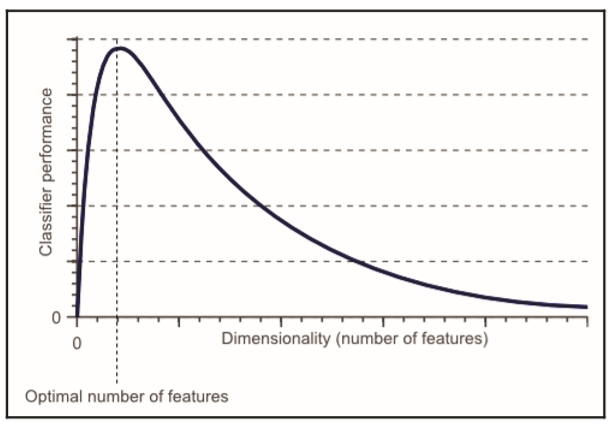

<center>模型特征数的性能对比</center>


上图显示，随着特征数量的增加，分类器的性能也会提高，直到达到最佳特征数。 基于训练集的相同大小添加更多的特征将降低分类器的性能。

### 2.1 避免维数灾难

在前面的章节中，我们展示了当特征数量超过某个最佳点时，分类器的性能将会降低。理论上，如果你有无限的训练样本，维度灾难就不存在了。因此，最佳的特征数完全取决于数据的大小。

一种有助于避免这种维数伤害的方法是从大量特征N中找到M特征的子集，其中M远远小于N. 来自M的每个特征可以是N中的一些特征的组合。有一些算法可以为你做到这一点。 这些算法试图找到有用的，不相关的，线性组合的原始N个特征。 常用的技术是主成分分析（PCA）。 PCA试图找到捕获原始数据最大方差的较少数量的特征。 您可以在这个有趣的博客上找到更多有关PCA的见解和完整说明： http://www.visiondummy.com/2014/05/feature-extraction-using-pca/.

通过使用以下代码，将PCA应用于原始培训功能的有用且简单的方法是：

```python
# 减少变量数应覆盖的最小方差百分比
variance_percentage = .99

# 创建PCA对象
pca_object = PCA(n_components=variance_percentage)

# 转换特征
input_values_transformed = pca_object.fit_transform(input_values, target_values)

# 用PCA为变换后的特征变量创建数据帧
pca_df = pd.DataFrame(input_values_transformed)

print(pca_df.shape[1], " reduced components which describe ", str(variance_percentage)[1:], "% of the variance")
```

## 3 泰坦尼克号案例的重新审视-（汇总）

在本节中，我们将把特征工程和降维的所有部分和放在一起：

```python

import re
import numpy as np
import pandas as pd
import random as rd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

# 打印设置，原始的threshold=10000,linewidth=160
np.set_printoptions(precision=4, threshold=10000, linewidth=160, edgeitems=999, suppress=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 160)
pd.set_option('expand_frame_repr', False)
pd.set_option('precision', 4)


# 构建二元特征
def process_embarked():
    global df_titanic_data

    # 用众数代替缺失值
    df_titanic_data.Embarked[df_titanic_data.Embarked.isnull()] = df_titanic_data.Embarked.dropna().mode().values

    # 将值转换为数字
    df_titanic_data['Embarked'] = pd.factorize(df_titanic_data['Embarked'])[0]

    # 对构造的特征进行二值化
    if keep_binary:
        df_titanic_data = pd.concat([df_titanic_data, \
        pd.get_dummies(df_titanic_data['Embarked']).rename(columns=lambda x: 'Embarked_' + str(x))], axis=1)



# 定义一个辅助函数，可以使用RandomForestClassifier（随机森林分类器）来处理age变量的缺失值
def set_missing_ages():
    global df_titanic_data

    age_data = df_titanic_data[['Age', 'Embarked', 'Fare', 'Parch', 'SibSp', 'Title_id', 'Pclass', 'Names', 'CabinLetter']]
    input_values_RF = age_data.loc[(df_titanic_data.Age.notnull())].values[:, 1::]
    target_values_RF = age_data.loc[(df_titanic_data.Age.notnull())].values[:, 0]

    # 从sklearn的随机森林回归函数创建对象
    regressor = RandomForestRegressor(n_estimators=2000, n_jobs=-1)

    # 根据上面的输入值和目标值构建模型
    regressor.fit(input_values_RF, target_values_RF)

    # 使用训练的模型来预测缺失值
    predicted_ages = regressor.predict(age_data.loc[(df_titanic_data.Age.isnull())].values[:, 1::])

    # 在原始的泰坦数据帧中填充预测的年龄
    age_data.loc[(age_data.Age.isnull()), 'Age'] = predicted_ages


# 辅助函数用于从年龄变量构造特征
def process_age():
    global df_titanic_data

    # 调用set_missing_ages辅助函数以使用随机森林回归来预测缺失的年龄值
    set_missing_ages()

    # 通过以单位方差为中心围绕均值来缩放年龄变量
    if keep_scaled:
        scaler_preprocessing = preprocessing.StandardScaler()
        df_titanic_data['Age_scaled'] = scaler_preprocessing.fit_transform(df_titanic_data.Age.reshape(-1, 1))

    # 为儿童构建一个特征
    df_titanic_data['isChild'] = np.where(df_titanic_data.Age < 13, 1, 0)

    # 分成四分位数并创建二进制特征
    df_titanic_data['Age_bin'] = pd.qcut(df_titanic_data['Age'], 4)

    if keep_binary:
        df_titanic_data = pd.concat([df_titanic_data, \
        pd.get_dummies(df_titanic_data['Age_bin']).rename(columns=lambda y: 'Age_' + str(y))],
        axis=1)

    if keep_bins:
        df_titanic_data['Age_bin_id'] = pd.factorize(df_titanic_data['Age_bin'])[0] + 1

    if keep_bins and keep_scaled:
        scaler_processing = preprocessing.StandardScaler()
        df_titanic_data['Age_bin_id_scaled'] = scaler_processing.fit_transform(df_titanic_data.Age_bin_id.reshape(-1, 1))

    if not keep_strings:
        df_titanic_data.drop('Age_bin', axis=1, inplace=True)


# 辅助函数，用于构建乘客/机组人员姓名的特征
def process_name():
    global df_titanic_data

    # 在names变量中获取不同的名称
    df_titanic_data['Names'] = df_titanic_data['Name'].map(lambda y: len(re.split(' ', y)))

    # 获得每个人的头衔
    df_titanic_data['Title'] = df_titanic_data['Name'].map(lambda y: re.compile(", (.*?)\.").findall(y)[0])

    # 处理出现次数少的头衔
    df_titanic_data['Title'][df_titanic_data.Title == 'Jonkheer'] = 'Master'
    df_titanic_data['Title'][df_titanic_data.Title.isin(['Ms', 'Mlle'])] = 'Miss'
    df_titanic_data['Title'][df_titanic_data.Title == 'Mme'] = 'Mrs'
    df_titanic_data['Title'][df_titanic_data.Title.isin(['Capt', 'Don', 'Major', 'Col', 'Sir'])] = 'Sir'
    df_titanic_data['Title'][df_titanic_data.Title.isin(['Dona', 'Lady', 'the Countess'])] = 'Lady'

    # 使所有特征二值化
    if keep_binary:
    df_titanic_data = pd.concat(
        [df_titanic_data, pd.get_dummies(df_titanic_data['Title']).rename(columns=lambda x: 'Title_' + str(x))],
        axis=1)

    # 缩放
    if keep_scaled:
        scaler_preprocessing = preprocessing.StandardScaler()
        df_titanic_data['Names_scaled'] = scaler_preprocessing.fit_transform(df_titanic_data.Names.reshape(-1, 1))

    # 分级
    if keep_bins:
        df_titanic_data['Title_id'] = pd.factorize(df_titanic_data['Title'])[0] + 1

    if keep_bins and keep_scaled:
        scaler = preprocessing.StandardScaler()
        df_titanic_data['Title_id_scaled'] = scaler.fit_transform(df_titanic_data.Title_id.reshape(-1, 1))


# 从客舱输入变量产生特征
def process_cabin():
    # 指的是包含泰坦尼克例子的全局变量
    global df_titanic_data

    # 用U0来替换客舱变量的缺失值
    df_titanic_data['Cabin'][df_titanic_data.Cabin.isnull()] = 'U0'

    # 客舱编号是一系列字母数字，因此我们将创建一些特征
    # 来自客舱编号字母的一部分
    df_titanic_data['CabinLetter'] = df_titanic_data['Cabin'].map(lambda l: get_cabin_letter(l))
    df_titanic_data['CabinLetter'] = pd.factorize(df_titanic_data['CabinLetter'])[0]

    # 将客舱字母特征二值化
    if keep_binary:
        cletters = pd.get_dummies(df_titanic_data['CabinLetter']).rename(columns=lambda x: 'CabinLetter_' + str(x))
        df_titanic_data = pd.concat([df_titanic_data, cletters], axis=1)

    # 从客舱的数字侧创建特征
    df_titanic_data['CabinNumber'] = df_titanic_data['Cabin'].map(lambda x: get_cabin_num(x)).astype(int) + 1

    # 缩放特征
    if keep_scaled:
        scaler_processing = preprocessing.StandardScaler()
        df_titanic_data['CabinNumber_scaled'] = scaler_processing.fit_transform(df_titanic_data.CabinNumber.reshape(-1, 1))


def get_cabin_letter(cabin_value):
    # 搜索客舱字母数字值中的字母
    letter_match = re.compile("([a-zA-Z]+)").search(cabin_value)

    if letter_match:
        return letter_match.group()
    else:
        return 'U'


def get_cabin_num(cabin_value):
    #搜索客舱字母数字值中的数字
    number_match = re.compile("([0-9]+)").search(cabin_value)
    if number_match:
        return number_match.group()
    else:
        return 0


# 用于从票价变量构造特征的辅助函数
def process_fare():
    global df_titanic_data

    # 用票价的中位数来替换缺失值
    df_titanic_data['Fare'][np.isnan(df_titanic_data['Fare'])] = df_titanic_data['Fare'].median()

    # 票价中的0会导致一些分区问题，因此我们将它们设置为最低票价的十分之一
    df_titanic_data['Fare'][np.where(df_titanic_data['Fare'] == 0)[0]] = df_titanic_data['Fare'][df_titanic_data['Fare'].\
                                                                    nonzero()[0]].min() / 10

    # 通过将特征分类为分位数来对特征进行二值化
    df_titanic_data['Fare_bin'] = pd.qcut(df_titanic_data['Fare'], 4)

    if keep_binary:
        df_titanic_data = pd.concat([df_titanic_data, \
        pd.get_dummies(df_titanic_data['Fare_bin']).rename(columns=lambda x: 'Fare_' + str(x))],axis=1)

    # 分级
    if keep_bins:
        df_titanic_data['Fare_bin_id'] = pd.factorize(df_titanic_data['Fare_bin'])[0] + 1

    # 缩放值
    if keep_scaled:
        scaler_processing = preprocessing.StandardScaler()
        df_titanic_data['Fare_scaled'] = scaler_processing.fit_transform(df_titanic_data.Fare.reshape(-1, 1))

    if keep_bins and keep_scaled:
        scaler_processing = preprocessing.StandardScaler()
        df_titanic_data['Fare_bin_id_scaled'] = scaler_processing.fit_transform(df_titanic_data.Fare_bin_id.reshape(-1, 1))

    if not keep_strings:
        df_titanic_data.drop('Fare_bin', axis=1, inplace=True)


# 辅助函数用于从票证变量中构建特征
def process_ticket():
    global df_titanic_data

    df_titanic_data['TicketPrefix'] = df_titanic_data['Ticket'].map(lambda y: get_ticket_prefix(y.upper()))
    df_titanic_data['TicketPrefix'] = df_titanic_data['TicketPrefix'].map(lambda y: re.sub('[\.?\/?]', '', y))
    df_titanic_data['TicketPrefix'] = df_titanic_data['TicketPrefix'].map(lambda y: re.sub('STON', 'SOTON', y))

    df_titanic_data['TicketPrefixId'] = pd.factorize(df_titanic_data['TicketPrefix'])[0]

    # 每个票证层进行二值化
    if keep_binary:
        prefixes = pd.get_dummies(df_titanic_data['TicketPrefix']).\
            rename(columns=lambda y: 'TicketPrefix_' + str(y))df_titanic_data = pd.concat([df_titanic_data, prefixes], axis=1)

    df_titanic_data.drop(['TicketPrefix'], axis=1, inplace=True)

    df_titanic_data['TicketNumber'] = df_titanic_data['Ticket'].map(lambda y: get_ticket_num(y))
    df_titanic_data['TicketNumberDigits'] = df_titanic_data['TicketNumber'].map(lambda y: len(y)).astype(np.int)
    df_titanic_data['TicketNumberStart'] = df_titanic_data['TicketNumber'].map(lambda y: y[0:1]).astype(np.int)

    df_titanic_data['TicketNumber'] = df_titanic_data.TicketNumber.astype(np.int)

    if keep_scaled:
        scaler_processing = preprocessing.StandardScaler()
        df_titanic_data['TicketNumber_scaled'] = scaler_processing.fit_transform(df_titanic_data.TicketNumber.reshape(-1, 1))


def get_ticket_prefix(ticket_value):
    # 搜索票证字母数字值中的字母
    match_letter = re.compile("([a-zA-Z\.\/]+)").search(ticket_value)
    if match_letter:
        return match_letter.group()
    else:
        return 'U'


def get_ticket_num(ticket_value):
    # 搜索票证字母数字值中的数字
    match_number = re.compile("([\d]+＄)").search(ticket_value)
    if match_number:
        return match_number.group()
    else:
        return '0'


# 从乘客类变量中提取特征
def process_PClass(): 
    global df_titanic_data

    # 用众数来替换缺失值
    df_titanic_data.Pclass[df_titanic_data.Pclass.isnull()] = df_titanic_data.Pclass.dropna().mode().values

    # 对特征进行二值化
    if keep_binary:
        df_titanic_data = pd.concat([df_titanic_data, \
        pd.get_dummies(df_titanic_data['Pclass']).rename(columns=lambda y: 'Pclass_' + str(y))],axis=1)

    if keep_scaled:
        scaler_preprocessing = preprocessing.StandardScaler()
        df_titanic_data['Pclass_scaled'] = scaler_preprocessing.fit_transform(df_titanic_data.Pclass.reshape(-1, 1))


# 基于SibSp和Parch等家庭变量构建特征
def process_family(): global df_titanic_data

    # 确保在使用交互变量中没有零
    df_titanic_data['SibSp'] = df_titanic_data['SibSp'] + 1
    df_titanic_data['Parch'] = df_titanic_data['Parch'] + 1

    # 缩放
    if keep_scaled:
        scaler_preprocessing = preprocessing.StandardScaler()
        df_titanic_data['SibSp_scaled'] = scaler_preprocessing.fit_transform(df_titanic_data.SibSp.reshape(-1, 1))
        df_titanic_data['Parch_scaled'] = scaler_preprocessing.fit_transform(df_titanic_data.Parch.reshape(-1, 1))

    # 对所有特征进行二值化
    if keep_binary:
        sibsps_var = pd.get_dummies(df_titanic_data['SibSp']).rename(columns=lambda y: 'SibSp_' + str(y))
        parchs_var = pd.get_dummies(df_titanic_data['Parch']).rename(columns=lambda y: 'Parch_' + str(y))
        df_titanic_data = pd.concat([df_titanic_data, sibsps_var, parchs_var], axis=1)
# 将性别变量二值化 
def process_sex():
    global df_titanic_data 
    df_titanic_data['Gender'] = np.where(df_titanic_data['Sex'] == 'male', 1, 0)


#删除掉原始的变量 
def process_drops(): 
    global df_titanic_data 
    drops = ['Name', 'Names', 'Title', 'Sex', 'SibSp', 'Parch', 'Pclass', 'Embarked', \ 
            'Cabin', 'CabinLetter', 'CabinNumber', 'Age', 'Fare', 'Ticket', 'TicketNumber'] 
    string_drops = ['Title', 'Name', 'Cabin', 'Ticket', 'Sex', 'Ticket', 'TicketNumber'] 
    if not keep_raw: 
    df_titanic_data.drop(drops, axis=1, inplace=True) 
    elif not keep_strings: 
    df_titanic_data.drop(string_drops, axis=1, inplace=True)


# 处理所有特征工程
def get_titanic_dataset(binary=False, bins=False, scaled=False, strings=False, raw=True, pca=False, balanced=False): 
    global keep_binary, keep_bins, keep_scaled, keep_raw, keep_strings, df_titanic_data 
    keep_binary = binary 
    keep_bins = bins 
    keep_scaled = scaled 
    keep_raw = raw 
    keep_strings = strings

    # 用Pandas读取训练集与测试集
    train_data = pd.read_csv('data/train.csv', header=0)
    test_data = pd.read_csv('data/test.csv', header=0)

    # 将训练集和测试集连接在一起，以完成整体特征工程
    df_titanic_data = pd.concat([train_data, test_data])

    # 通过重新索引数据来移除训练集和测试集所导致的重复索引
    df_titanic_data.reset_index(inplace=True)

    # 删除reset_index（）函数生成的索引列
    df_titanic_data.drop('index', axis=1, inplace=True)

    # 将列索引为从1开始的索引
    df_titanic_data = df_titanic_data.reindex_axis(train_data.columns, axis=1)

    # 使用我们在上面定义的辅助函数处理titanic原始变量
    process_cabin()
    process_ticket()
    process_name()
    process_fare()
    process_embarked()
    process_family()
    process_sex()
    process_PClass()
    process_age()
    process_drops()

    # 将servived列移动到第一个列
    columns_list = list(df_titanic_data.columns.values)
    columns_list.remove('Survived')
    new_col_list = list(['Survived'])
    new_col_list.extend(columns_list)
    df_titanic_data = df_titanic_data.reindex(columns=new_col_list)

    print("Starting with", df_titanic_data.columns.size,\
          "manually constructing features based on the interaction between them...\n", df_titanic_data.columns.values)

    # 基于个体特征相互作用的特征构造
    numeric_features = df_titanic_data.loc[:,['Age_scaled', 'Fare_scaled', 'Pclass_scaled', 'Parch_scaled', 'SibSp_scaled',\
                        'Names_scaled', 'CabinNumber_scaled', 'Age_bin_id_scaled', 'Fare_bin_id_scaled']]
    print("\nUsing only numeric features for automated feature generation:\n", numeric_features.head(10))

    new_fields_count = 0
    for i in range(0, numeric_features.columns.size - 1):
        for j in range(0, numeric_features.columns.size - 1):
            if i <= j:
                name = str(numeric_features.columns.values[i]) + "*" + str(numeric_features.columns.values[j])
                df_titanic_data = pd.concat(
                    [df_titanic_data, pd.Series(numeric_features.iloc[:, i] * numeric_features.iloc[:, j], name=name)],
                    axis=1)
                new_fields_count += 1
            if i < j:
                name = str(numeric_features.columns.values[i]) + "+" + str(numeric_features.columns.values[j])
                df_titanic_data = pd.concat(
                    [df_titanic_data, pd.Series(numeric_features.iloc[:, i] + numeric_features.iloc[:, j], name=name)],
                    axis=1)
                new_fields_count += 1
            if not i == j:
                name = str(numeric_features.columns.values[i]) + "/" + str(numeric_features.columns.values[j])
                df_titanic_data = pd.concat(
                    [df_titanic_data, pd.Series(numeric_features.iloc[:, i] / numeric_features.iloc[:, j], name=name)],
                    axis=1)
                name = str(numeric_features.columns.values[i]) + "-" + str(numeric_features.columns.values[j])
                df_titanic_data = pd.concat(
                    [df_titanic_data, pd.Series(numeric_features.iloc[:, i] - numeric_features.iloc[:, j], name=name)],
                    axis=1)
                new_fields_count += 2

    print("\n", new_fields_count, "new features constructed")

    # 使用Spearman相关方法去除具有高相关性的特征

    # 计算相关矩阵
    df_titanic_data_cor = df_titanic_data.drop(['Survived', 'PassengerId'], axis=1).corr(method='spearman')

    # 创建一个能忽略相关的掩码
    mask_ignore = np.ones(df_titanic_data_cor.columns.size) - np.eye(df_titanic_data_cor.columns.size)
    df_titanic_data_cor = mask_ignore * df_titanic_data_cor

    features_to_drop = []

    # 删除相关的特征
    for column in df_titanic_data_cor.columns.values:

        # 检查我们是否已决定删除此变量
        if np.in1d([column], features_to_drop):
            continue

        # 找到高度相关的变量
        corr_vars = df_titanic_data_cor[abs(df_titanic_data_cor[column]) > 0.98].index
        features_to_drop = np.union1d(features_to_drop, corr_vars)

    print("\nWe are going to drop", features_to_drop.shape[0], " which are highly correlated features...\n")
    df_titanic_data.drop(features_to_drop, axis=1, inplace=True)

    # 拆分数据集以进行训练和测试并进行PCA
    train_data = df_titanic_data[:train_data.shape[0]]
    test_data = df_titanic_data[test_data.shape[0]:]

    if pca:
        print("reducing number of variables...")
        train_data, test_data = reduce(train_data, test_data)
    else:
        # 删除在集合连接期间创建的测试集的空“Survived”列
        test_data.drop('Survived', axis=1, inplace=True)

    print("\n", train_data.columns.size, "initial features generated...\n")

    return train_data, test_data


# 将训练集和测试集降维
def reduce(train_data, test_data):

    # 将全部数据加到一起
    df_titanic_data = pd.concat([train_data, test_data])
    df_titanic_data.reset_index(inplace=True)
    df_titanic_data.drop('index', axis=1, inplace=True)
    df_titanic_data = df_titanic_data.reindex_axis(train_data.columns, axis=1)

    # 将survived 这一列转化格式为series
    survived_series = pd.Series(df['Survived'], name='Survived')

    print(df_titanic_data.head())

    # 获取输入和目标值
    input_values = df_titanic_data.values[:, 1::]
    target_values = df_titanic_data.values[:, 0]

    print(input_values[0:10])

    # 减少到的变量数量应涵盖的最小方差百分比（即为主成分的累积贡献率）
    variance_percentage = .99

    # 创建PCA对象
    pca_object = PCA(n_components=variance_percentage)

    # 特征转换
    input_values_transformed = pca_object.fit_transform(input_values, target_values)

    # 用PCA为变换后的变量创建数据帧
    pca_df = pd.DataFrame(input_values_transformed)

    print(pca_df.shape[1], " reduced components which describe ", str(variance_percentage)[1:], "% of the variance")

    # 构建一个包含新减少的PCA变量的新数据帧
    df_titanic_data = pd.concat([survived_series, pca_df], axis=1)

    # 再次分成单独的输入和测试集
    train_data = df_titanic_data[:train_data.shape[0]]
    test_data = df_titanic_data[test_data.shape[0]:]
    test_data.reset_index(inplace=True)
    test_data.drop('index', axis=1, inplace=True)
    test_data.drop('Survived', axis=1, inplace=True)

    return train_data, test_data


# 调用辅助函数
if __name__ == '__main__':
    train, test = get_titanic_dataset(bins=True, scaled=True, binary=True)
    initial_drops = ['PassengerId']
    train.drop(initial_drops, axis=1, inplace=True)
    test.drop(initial_drops, axis=1, inplace=True)

    train, test = reduce(train, test)

    print(train.columns.values)
```


## 4.偏差方差分解
在前一节中，我们知道如何为我们的模型选择最佳的超参数。基于最小化交叉验证误差的措施，选择了这组最佳超参数。现在，我们需要看到模型将如何对未看到的数据或所谓的样本外数据执行操作，该数据是指在模型训练阶段没有看到的新数据样本。

考虑以下示例：我们有一个大小为10000的数据样本，我们将用不同大小的训练集来训练同一模型，并在每个步骤绘制测试误差。例如，我们将拿出1000作为测试集，并使用其他9000来进行训练集。因此，对于第一轮训练，我们将从9,000件物品中随机选择大小为100的训练集。 我们将基于最佳选择的超参数集训练模型，使用测试集测试模型，最后绘制训练（样本内）误差和测试（样本外）误差。 我们重复这种训练，测试和绘制不同大小的训练（例如，重复9,000中的500，然后是9,000中的1,000，依此类推）。

在完成所有这些训练，测试和绘图之后，我们将获得两条曲线图，表示同一模型但不同训练集大小的训练误差和测试误差。 从这张图中，我们将了解我们的模型有多好。

输出图将包含表示训练和测试误差的两条曲线，它将是图2所示的四种可能形状之一。不同形状的来源是Andrew Ng在CurSera上的机器学习课程（https://www.coursera.org/learn/machine-learning）。 这是一个很棒的课程，有很多关于机器学习新手的见解和最佳实践：
    
    
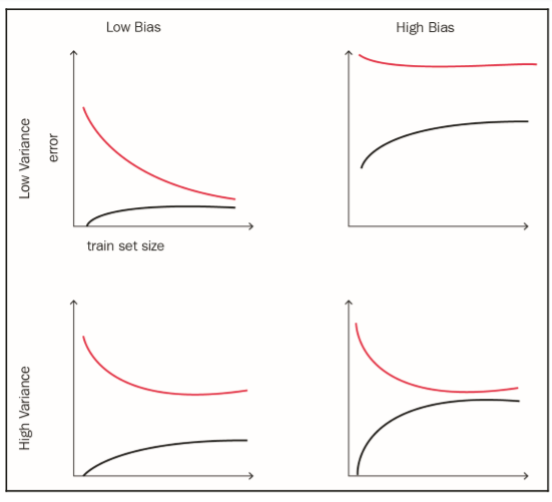
<center>绘制不同训练集大小的训练和测试误差的可能形状</center>

那么，我们什么时候应该接受我们的模型并投入生产？ 我们何时才知道我们的模型在测试集上表现不佳，因此不会出不好的泛化错误？ 这些问题的答案取决于你在绘制训练误差曲线与不同训练集大小的测试误差曲线时得到的形状：

- 如果你的形状看起来像左上角那么，它代表了一个低训练误差并且在测试集上得到了很好的推广。 这种形状是可行的，你应该继续在生产中使用这个模型。
- 如果您的形状类似于右上角，则表示高训练误差（模型无法从训练样本中学习），甚至在测试集上的泛化性能也更差。 这种形状完全失败，您需要返回并查看数据，选择的学习算法和/或选定的超参数有什么问题。
- 如果您的形状类似于左下角，则表示训练错误，因为模型无法捕获数据的基础结构，这也适合新的测试数据。
- 如果您的形状类似于右下角，则表示高偏差和方差。 这意味着您的模型没有很好地计算出训练数据，因此在测试集上没有很好地概括。

偏差和方差是我们可以用来确定我们的模型有多好的组件。 在有监督的学习中，存在两个相反的错误来源，并且使用图2中的学习曲线，我们可以弄清楚由于我们的模型正在使用哪些组件。 具有高方差和低偏差的问题被称为过度拟合，这意味着该模型在训练样本上表现良好，但在测试集上没有很好地概括。 另一方面，具有高偏差和低方差的问题被称为欠拟合，这意味着模型没有利用数据并且没有设法从输入特征估计输出/目标。 可以使用不同的方法来避免陷入其中一个问题。 但通常情况下，增强其中一个将以牺牲第二个为代价。

我们可以通过添加模型可以学习的更多特征来解决高方差的情况。 这种解决方案很可能会增加偏差，因此您需要在它们之间进行某种权衡。


## 5.学习可见度

有许多伟大的数据科学算法可以用来解决不同领域的问题，但使学习过程可见的关键组件是有足够的数据。你可能会问，学习过程需要多少数据是可见的和值得做的。根据经验法则，研究人员和机器学习实践者都同意在模型中需要至少10倍自由度的数据样本。

例如，在线性模型的情况下，自由度表示数据集中的特征数量。如果您的数据中有50个解释性特征，那么你需要至少500个数据样本/数据中的观测值。

在实践中，你可以摆脱这个规则，使用数据中少于10倍的特性进行学习；如果您的模型很简单，并且你正在使用所谓的正则化（在下一章中介绍），则这种情况通常会发生。Jake Vanderplas写了一篇文章（https://jakevdp.github.io/blog/2015/07/06/model-complexity-myth/）， 说明即使数据具有比示例更多的参数，也可以学习。为了证明这一点，他使用了正则化。


## 6.总结

在本章中，我们介绍了机器学习从业者使用的最重要的工具，以便了解他们的数据并获得学习算法以充分利用他们的数据。

特征工程是数据科学中第一个也是常用的工具; 它是任何数据科学管道中必不可少的组件。 此工具的目的是为您的数据做出更好的表示，并提高模型的预测能力。

我们看到了大量特征如何成为问题并导致分类器性能更差。我们还发现应该使用最佳数量的特征来获得最大的模型性能，并且这个最佳特征数量是你获得的数据样本/观察数量的函数。

随后，我们介绍了最强大的工具之一，即偏差方差分解。该工具广泛用于测试模型在测试集上的好坏程度。最后，我们学习了可见性，这解决了我们为了开展业务和进行机器学习需要多少数据的问题。经验法则表明，我们需要数据样本/观察数据至少是数据中特征数量的10倍。但是，这个经验法则可以通过使用另一个称为正则化的工具来打破，这将在下一章中详细讨论。

接下来，我们将继续增加我们可用于从我们的数据中推动有意义的分析的数据科学工具，并面对应用机器学习的日常问题。

学号|姓名|专业
-|-|-
201802110541|王俊艳|理学统计
201802110538|刘一帆|理学统计
